# Efficiencies for QCD background and Z(H) signals for HLT_Mu17_Photon30 and different kinematical cuts

## Imports

In [3]:
# imports

import uproot
import numpy as np
import awkward as ak
import matplotlib.pyplot as plt
import mplhep as hep
plt.style.use([hep.style.CMS])
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema

## Kinematical cuts

In [4]:
thMuon = 18.
thPhoton = 32.

## Efficiencies for QCD background

In [5]:
# read the file

QCD_events = NanoEventsFactory.from_root('data.nosync/QCD_Pt-30_MuEnrichedPt4_TuneCP5_13TeV_pythia8_RunIISummer20UL16.root/QCD_Pt-30_MuEnrichedPt4_Mu10_Photon15.root', schemaclass = NanoAODSchema.v7, treepath='mergedEvents').events()

/usr/local/lib/python3.9/site-packages/coffea/nanoevents/schemas/nanoaod.py:193: RuntimeWarning: Missing cross-reference index for Electron_jetIdx => Jet
  warnings.warn(
/usr/local/lib/python3.9/site-packages/coffea/nanoevents/schemas/nanoaod.py:193: RuntimeWarning: Missing cross-reference index for Electron_photonIdx => Photon
  warnings.warn(
/usr/local/lib/python3.9/site-packages/coffea/nanoevents/schemas/nanoaod.py:193: RuntimeWarning: Missing cross-reference index for FatJet_subJetIdx1 => SubJet
  warnings.warn(
/usr/local/lib/python3.9/site-packages/coffea/nanoevents/schemas/nanoaod.py:193: RuntimeWarning: Missing cross-reference index for FatJet_subJetIdx2 => SubJet
  warnings.warn(
/usr/local/lib/python3.9/site-packages/coffea/nanoevents/schemas/nanoaod.py:193: RuntimeWarning: Missing cross-reference index for FsrPhoton_muonIdx => Muon
  warnings.warn(
/usr/local/lib/python3.9/site-packages/coffea/nanoevents/schemas/nanoaod.py:193: RuntimeWarning: Missing cross-reference index

In [6]:
Ntot_QCD_events = 21335910 # total of events in the whole of the 16 QCD files

### HLT_Mu17_Photon30

In [7]:
QCD_mask_kin = (QCD_events.Muon1.pt > thMuon) & (QCD_events.Photon1.pt > thPhoton)
QCD_mask_HLT = (QCD_events.HLT.Mu17_Photon30_CaloIdL_L1ISO == True)

QCD_mask_kin_HLT = QCD_mask_kin & QCD_mask_HLT

In [8]:
print("Total events passing the pre-selection:", len(QCD_events.Muon1.pt))
print("Events passing the 18 and 32 GeV cut:",  ak.sum(QCD_mask_kin))
print("Total events passing the HLT:", ak.sum(QCD_mask_HLT))
print("Total events passing the cuts AND the HLT:", ak.sum(QCD_mask_kin_HLT))

Total events passing the pre-selection: 527
Events passing the 18 and 32 GeV cut: 34
Total events passing the HLT: 34
Total events passing the cuts AND the HLT: 26


In [9]:
QCD_eff_trigger = ak.sum(QCD_mask_kin_HLT) / ak.sum(QCD_mask_kin) * 100 
print("QCD trigger efficiency (HLT_Mu17_Photon30): %i/%i = %.5f%%" % (ak.sum(QCD_mask_kin_HLT), ak.sum(QCD_mask_kin), (QCD_eff_trigger)))

QCD_eff_selection =  ak.sum(QCD_mask_kin) / Ntot_QCD_events * 100
print("QCD selection efficiency: %i/%i = %.5f%%" % (ak.sum(QCD_mask_kin), Ntot_QCD_events, QCD_eff_selection))


QCD trigger efficiency (HLT_Mu17_Photon30): 26/34 = 76.47059%
QCD selection efficiency: 34/21335910 = 0.00016%


## Efficiencies for Z signal

In [10]:
# read the file

Z_events = NanoEventsFactory.from_root('data.nosync/ZToJPsiG_JPsiToMuMu_TuneCP5_13TeV-madgraph-pythia8_RunIISummer20UL16/ZToJPsiG_JPsiToMuMu_Mu10_Photon15.root', schemaclass = NanoAODSchema.v7, treepath='mergedEvents').events()

/usr/local/lib/python3.9/site-packages/coffea/nanoevents/schemas/nanoaod.py:193: RuntimeWarning: Missing cross-reference index for Electron_jetIdx => Jet
  warnings.warn(
/usr/local/lib/python3.9/site-packages/coffea/nanoevents/schemas/nanoaod.py:193: RuntimeWarning: Missing cross-reference index for Electron_photonIdx => Photon
  warnings.warn(
/usr/local/lib/python3.9/site-packages/coffea/nanoevents/schemas/nanoaod.py:193: RuntimeWarning: Missing cross-reference index for FatJet_subJetIdx1 => SubJet
  warnings.warn(
/usr/local/lib/python3.9/site-packages/coffea/nanoevents/schemas/nanoaod.py:193: RuntimeWarning: Missing cross-reference index for FatJet_subJetIdx2 => SubJet
  warnings.warn(
/usr/local/lib/python3.9/site-packages/coffea/nanoevents/schemas/nanoaod.py:193: RuntimeWarning: Missing cross-reference index for FsrPhoton_muonIdx => Muon
  warnings.warn(
/usr/local/lib/python3.9/site-packages/coffea/nanoevents/schemas/nanoaod.py:193: RuntimeWarning: Missing cross-reference index

In [11]:
Ntot_Z_events = 459000 # total of events in the whole of the 6 Z boson files

### HLT_Mu17_Photon30

In [12]:
Z_mask_kin = (Z_events.Muon1.pt >= thMuon) & (Z_events.Photon1.pt >= thPhoton)
Z_mask_HLT = (Z_events.HLT.Mu17_Photon30_CaloIdL_L1ISO == True)

Z_mask_kin_HLT = Z_mask_kin & Z_mask_HLT

In [13]:
print("Total events passing the pre-selection:", len(Z_events.Muon1.pt))
print("Events passing the 18 and 32 GeV cut:",  ak.sum(Z_mask_kin))
print("Total events passing the HLT:", ak.sum(Z_mask_HLT))
print("Total events passing the cuts AND the HLT:", ak.sum(Z_mask_kin_HLT))

Total events passing the pre-selection: 137497
Events passing the 18 and 32 GeV cut: 98630
Total events passing the HLT: 87263
Total events passing the cuts AND the HLT: 81829


In [14]:
Z_eff_trigger = ak.sum(Z_mask_kin_HLT) / ak.sum(Z_mask_kin) * 100 
print("Z trigger efficiency (HLT_Mu17_Photon30): %i/%i = %.2f%%" % (ak.sum(Z_mask_kin_HLT), ak.sum(Z_mask_kin), (Z_eff_trigger)))

Z_eff_selection =  ak.sum(Z_mask_kin) / Ntot_Z_events * 100
print("Z selection efficiency: %i/%i = %.2f%%" % (ak.sum(Z_mask_kin), Ntot_Z_events, Z_eff_selection))

Z trigger efficiency (HLT_Mu17_Photon30): 81829/98630 = 82.97%
Z selection efficiency: 98630/459000 = 21.49%


## Efficiencies for H signal

In [15]:
# read the file

H_events = NanoEventsFactory.from_root('data.nosync/GluGluToH_HToJPsiG_JPsiToMuMu_TuneCP5_13TeV-madgraph-pythia8_RunIISummer20UL16/GluGluToH_HToJPsiG_JPsiToMuMu_Mu10_Photon15.root', schemaclass = NanoAODSchema.v7, treepath='mergedEvents').events()

In [16]:
Ntot_H_events = 448000 # total of events in the whole of the 10 H boson files

### HLT_Mu17_Photon30

In [17]:
H_mask_kin = (H_events.Muon1.pt >= thMuon) & (H_events.Photon1.pt >= thPhoton)
H_mask_HLT = (H_events.HLT.Mu17_Photon30_CaloIdL_L1ISO == True)

H_mask_kin_HLT = H_mask_kin & H_mask_HLT

In [18]:
print("Total events passing the pre-selection:", len(H_events.Muon1.pt))
print("Events passing the 18 and 32 GeV cut:",  ak.sum(H_mask_kin))
print("Total events passing the HLT:", ak.sum(H_mask_HLT))
print("Total events passing the cuts AND the HLT:", ak.sum(H_mask_kin_HLT))

Total events passing the pre-selection: 179556
Events passing the 18 and 32 GeV cut: 160587
Total events passing the HLT: 144804
Total events passing the cuts AND the HLT: 142102


In [19]:
H_eff_trigger = ak.sum(H_mask_kin_HLT) / ak.sum(H_mask_kin) * 100 
print("H trigger efficiency (HLT_Mu17_Photon30): %i/%i = %.2f%%" % (ak.sum(H_mask_kin_HLT), ak.sum(H_mask_kin), (H_eff_trigger)))

H_eff_selection =  ak.sum(H_mask_kin) / Ntot_H_events * 100
print("H selection efficiency: %i/%i = %.2f%%" % (ak.sum(H_mask_kin), Ntot_H_events, H_eff_selection))

H trigger efficiency (HLT_Mu17_Photon30): 142102/160587 = 88.49%
H selection efficiency: 160587/448000 = 35.85%


## Plots QCD

In [20]:
selectedMuon1 = QCD_events.Muon1[QCD_mask_kin_HLT]
selectedMuon2 = QCD_events.Muon2[QCD_mask_kin_HLT]
selectedPhoton1 = QCD_events.Photon1[QCD_mask_kin_HLT]
selectedJPsi = QCD_events.JPsi[QCD_mask_kin_HLT]
selectedHorZ = QCD_events.HorZ[QCD_mask_kin_HLT]

In [21]:
print("Passing from %i to %i filtered events after HLT trigger AND selection cuts (%.2f %%)" % (len(QCD_events), ak.sum(QCD_mask_kin_HLT), ak.sum(QCD_mask_kin_HLT) / len(QCD_events) * 100))

Passing from 527 to 26 filtered events after HLT trigger AND selection cuts (4.93 %)


### Muons $p_{T}$

Text(0.5, 1.0, 'QCD events')

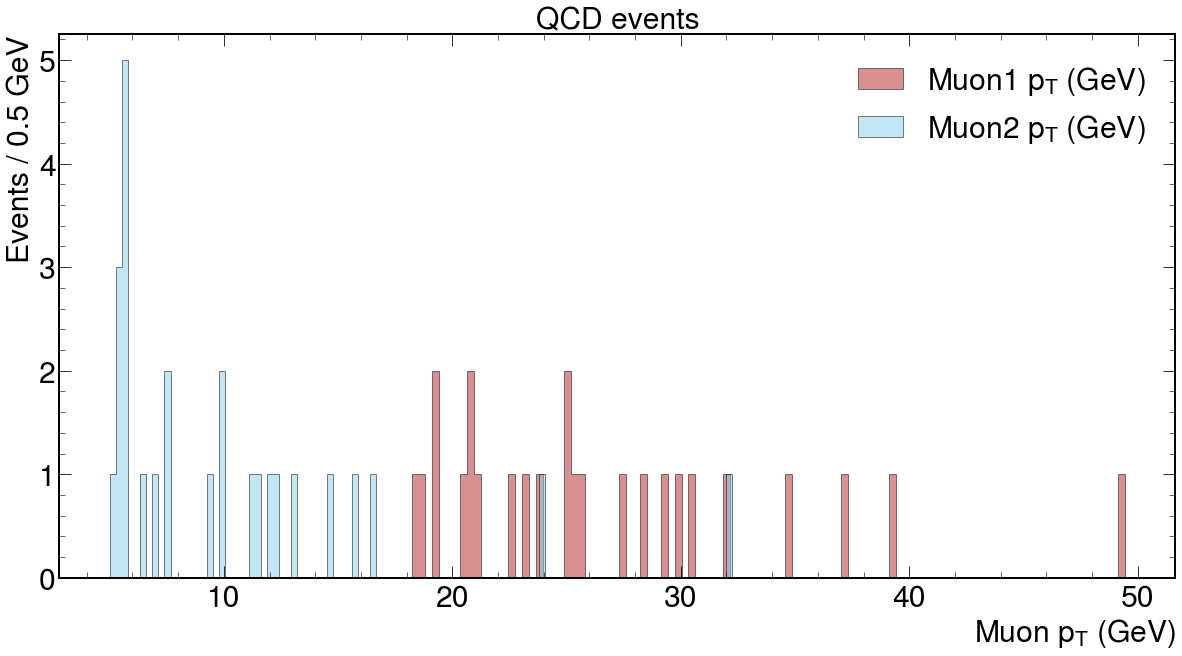

In [22]:
_min = 0
_max = ak.max(selectedMuon1.pt)
width = .5 # GeV
nbins = int(round((_max - _min) / width)) + 1

_muon1_pt =  ak.flatten(selectedMuon1.pt[(selectedMuon1.pt > _min) & (selectedMuon1.pt < _max)], axis = None)
_muon2_pt =  ak.flatten(selectedMuon2.pt[(selectedMuon2.pt > _min) & (selectedMuon2.pt < _max)], axis = None)

fig, ax = plt.subplots(figsize=(20, 10))
ax.hist(
    _muon1_pt,
    bins = nbins,
    histtype = "stepfilled",
    color = "firebrick",
    alpha = 0.5,
    edgecolor = "black",
    label = r"Muon1 $p_{T}$ (GeV)"
)
ax.hist(
    _muon2_pt,
    bins = nbins,
    histtype = "stepfilled",
    color = "skyblue",
    alpha = 0.5,
    edgecolor = "black",
    label = r"Muon2 $p_{T}$ (GeV)"
)
#ax.set_yscale("log")
ax.tick_params(axis = 'both', which = 'major', labelsize = 30)
ax.set_xlabel("Muon $p_{T}$ (GeV)", fontsize = 30)
ax.set_ylabel("Events / %.1f GeV" % width, fontsize = 30)
#ax.set_xlim(_min, _max)
#ax.set_ylim(0, 5)
ax.legend(loc = "best", fontsize = 30)
ax.set_title("QCD events", fontsize = 30)

### Photon $p_{T}$

Text(0.5, 1.0, 'QCD events')

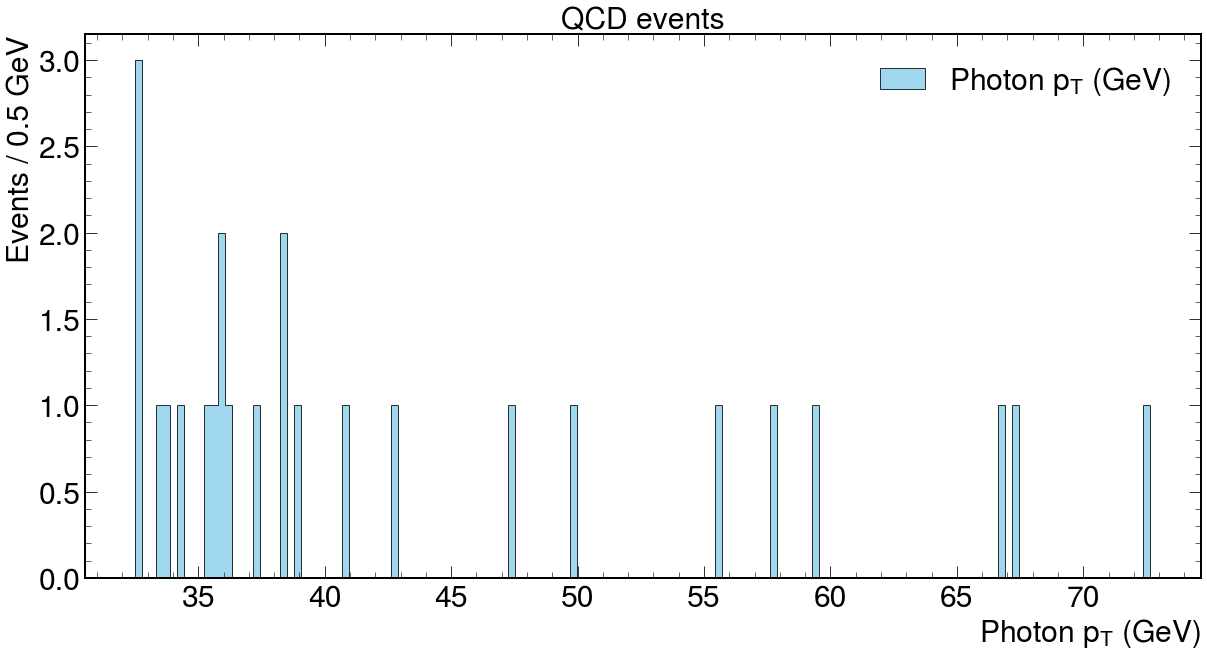

In [23]:
_min = 0
_max = ak.max(selectedPhoton1.pt)
width = .5 # GeV
nbins = int(round((_max - _min) / width)) + 1

_photon1_pt =  ak.flatten(selectedPhoton1.pt[(selectedPhoton1.pt > _min) & (selectedPhoton1.pt < _max)], axis = None)

fig, ax = plt.subplots(figsize=(20, 10))
ax.hist(
    _photon1_pt,
    bins = nbins,
    histtype = "stepfilled",
    color = "skyblue",
    alpha = 0.8,
    edgecolor = "black",
    label = r"Photon $p_{T}$ (GeV)"
)
#ax.set_yscale("log")
ax.tick_params(axis = 'both', which = 'major', labelsize = 30)
ax.set_xlabel("Photon $p_{T}$ (GeV)", fontsize = 30)
ax.set_ylabel("Events / %.1f GeV" % width, fontsize = 30)
#ax.set_xlim(_min, _max)
#ax.set_ylim(0, 5)
ax.legend(loc = "best", fontsize = 30)
ax.set_title("QCD events", fontsize = 30)

### Invariant $\mu\mu$ mass

Text(0.5, 1.0, 'QCD events')

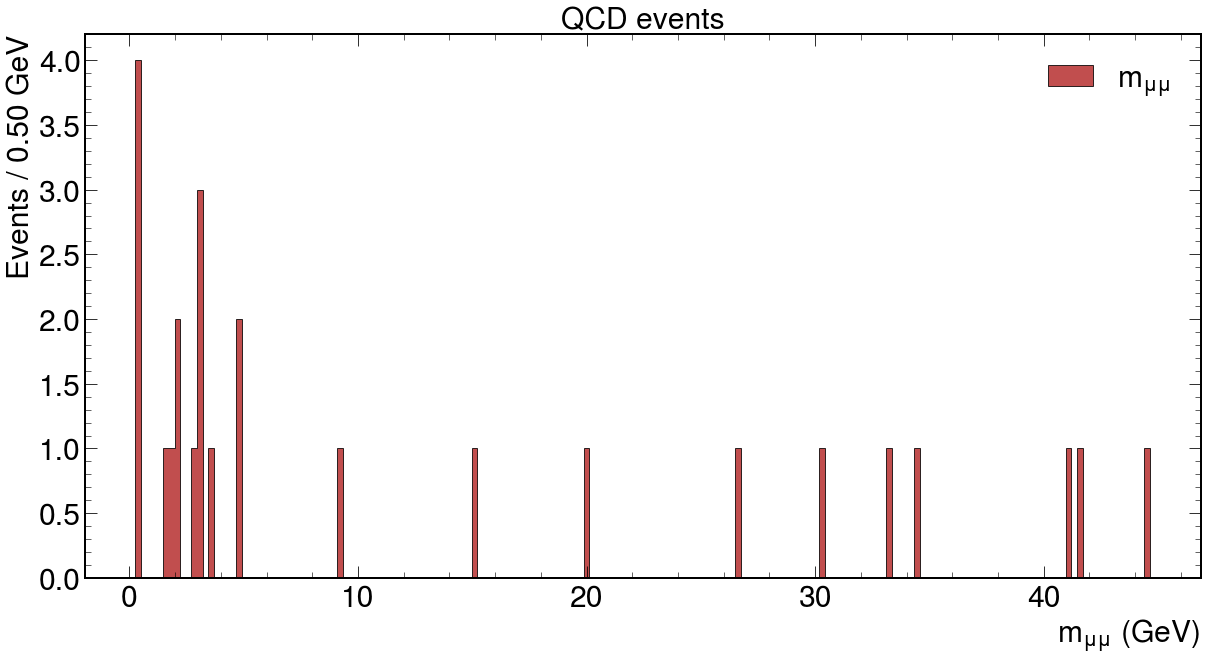

In [24]:
_min = 0
_max = ak.max(selectedJPsi.mass)
width = .5 # GeV
nbins = int(round((_max - _min) / width)) + 1

_JPsi_mass =  ak.flatten(selectedJPsi.mass[(selectedJPsi.mass > _min) & (selectedJPsi.mass < _max)], axis = None)


fig, ax = plt.subplots(figsize=(20, 10))
ax.hist(
    _JPsi_mass,
    bins = nbins,
    histtype = "stepfilled",
    color = "firebrick",
    alpha = 0.8,
    edgecolor = "black",
    label = r"$m_{\mu \mu}$"
)
#ax.set_yscale("log")
ax.tick_params(axis = 'both', which = 'major', labelsize = 30)
ax.set_xlabel("$m_{\mu \mu}\ ({\\rm GeV})$", fontsize = 30)
ax.set_ylabel("Events / %.2f GeV" % width, fontsize = 30)
#ax.set_xlim(_min, _max)
#ax.set_ylim(0, 5)
ax.legend(loc = "best", fontsize = 30)
ax.set_title("QCD events", fontsize = 30)

### Invariant $\mu\mu\gamma$ mass

Text(0.5, 1.0, 'QCD events')

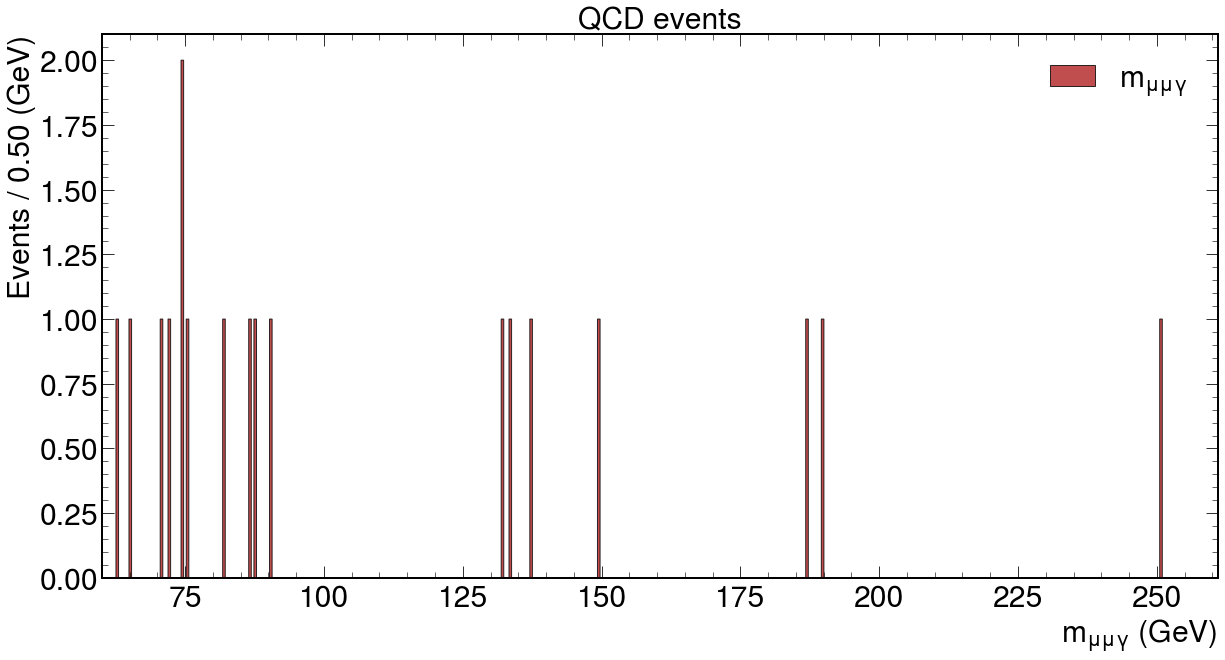

In [25]:
_min = 60
_max = ak.max(selectedHorZ.mass) + 10
width = .5 # GeV
nbins = int(round((_max - _min) / width)) + 1

_HorZ_mass =  ak.flatten(selectedHorZ.mass[(selectedHorZ.mass > _min) & (selectedHorZ.mass < _max)], axis = None)


fig, ax = plt.subplots(figsize=(20, 10))
ax.hist(
    _HorZ_mass,
    bins = nbins,
    histtype = "stepfilled",
    color = "firebrick",
    alpha = 0.8,
    edgecolor = "black",
    label = r"$m_{\mu \mu \gamma}$"
)
#ax.set_yscale("log")
ax.tick_params(axis = 'both', which = 'major', labelsize = 30)
ax.set_xlabel("$m_{\mu \mu \gamma}\ ({\\rm GeV})$", fontsize = 30)
ax.set_ylabel("Events / %.2f (GeV)" % width, fontsize = 30)
ax.set_xlim(_min, _max)
#ax.set_ylim(0, 5)
ax.legend(loc = "best", fontsize = 30)
ax.set_title("QCD events", fontsize = 30)

In [26]:
print("Events that satisfy 3 GeV < m(JPsi) < 3.2 GeV:", len(selectedJPsi.mass[(selectedJPsi.mass > 3) & (selectedJPsi.mass < 3.2)]))
print("Events that satisfy 70 < m(ZH) < 150 GeV:", len(selectedHorZ.mass[(selectedHorZ.mass > 70.) & (selectedHorZ.mass < 150.)]))
print("Events that satisfy 3 GeV < m(JPsi) < 3.2 GeV AND 70 < m(ZH) < 150 GeV:", len(selectedHorZ.mass[(selectedJPsi.mass > 3) & (selectedJPsi.mass < 3.2) & (selectedHorZ.mass > 70.) & (selectedHorZ.mass < 150.)]))

Events that satisfy 3 GeV < m(JPsi) < 3.2 GeV: 3
Events that satisfy 70 < m(ZH) < 150 GeV: 13
Events that satisfy 3 GeV < m(JPsi) < 3.2 GeV AND 70 < m(ZH) < 150 GeV: 2


## Plots Z boson

In [27]:
selectedMuon1 = Z_events.Muon1[Z_mask_kin_HLT]
selectedMuon2 = Z_events.Muon2[Z_mask_kin_HLT]
selectedPhoton1 = Z_events.Photon1[Z_mask_kin_HLT]
selectedJPsi = Z_events.JPsi[Z_mask_kin_HLT]
selectedHorZ = Z_events.HorZ[Z_mask_kin_HLT]

In [28]:
print("Passing from %i to %i filtered events after HLT trigger AND selection cuts (%.2f %%)" % (len(Z_events), ak.sum(Z_mask_kin_HLT), ak.sum(Z_mask_kin_HLT) / len(Z_events) * 100))

Passing from 137497 to 81829 filtered events after HLT trigger AND selection cuts (59.51 %)


### Muons $p_{T}$

Text(0.5, 1.0, 'Z boson events')

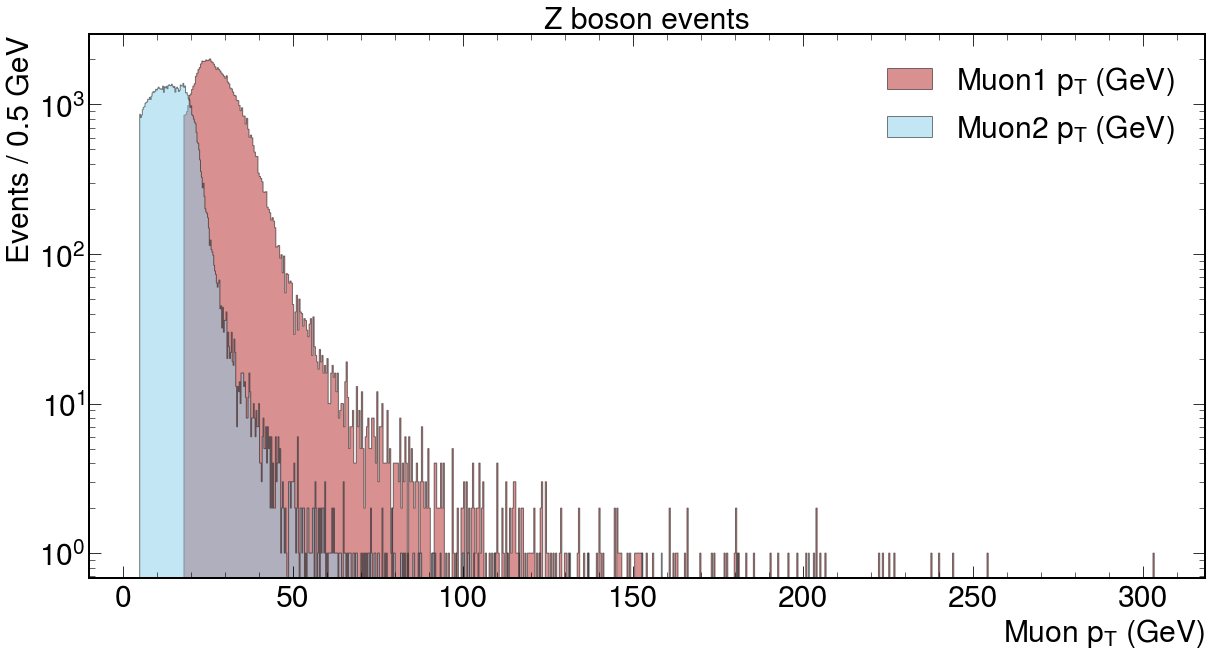

In [29]:
_min = 0
_max = ak.max(selectedMuon1.pt)
width = .5 # GeV
nbins = int(round((_max - _min) / width)) + 1

_muon1_pt =  ak.flatten(selectedMuon1.pt[(selectedMuon1.pt > _min) & (selectedMuon1.pt < _max)], axis = None)
_muon2_pt =  ak.flatten(selectedMuon2.pt[(selectedMuon2.pt > _min) & (selectedMuon2.pt < _max)], axis = None)

fig, ax = plt.subplots(figsize=(20, 10))
ax.hist(
    _muon1_pt,
    bins = nbins,
    histtype = "stepfilled",
    color = "firebrick",
    alpha = 0.5,
    edgecolor = "black",
    label = r"Muon1 $p_{T}$ (GeV)"
)
ax.hist(
    _muon2_pt,
    bins = nbins,
    histtype = "stepfilled",
    color = "skyblue",
    alpha = 0.5,
    edgecolor = "black",
    label = r"Muon2 $p_{T}$ (GeV)"
)
ax.set_yscale("log")
ax.tick_params(axis = 'both', which = 'major', labelsize = 30)
ax.set_xlabel("Muon $p_{T}$ (GeV)", fontsize = 30)
ax.set_ylabel("Events / %.1f GeV" % width, fontsize = 30)
#ax.set_xlim(_min, _max)
#ax.set_ylim(0, 5)
ax.legend(loc = "best", fontsize = 30)
ax.set_title("Z boson events", fontsize = 30)

### Photon $p_{T}$

Text(0.5, 1.0, 'Z boson events')

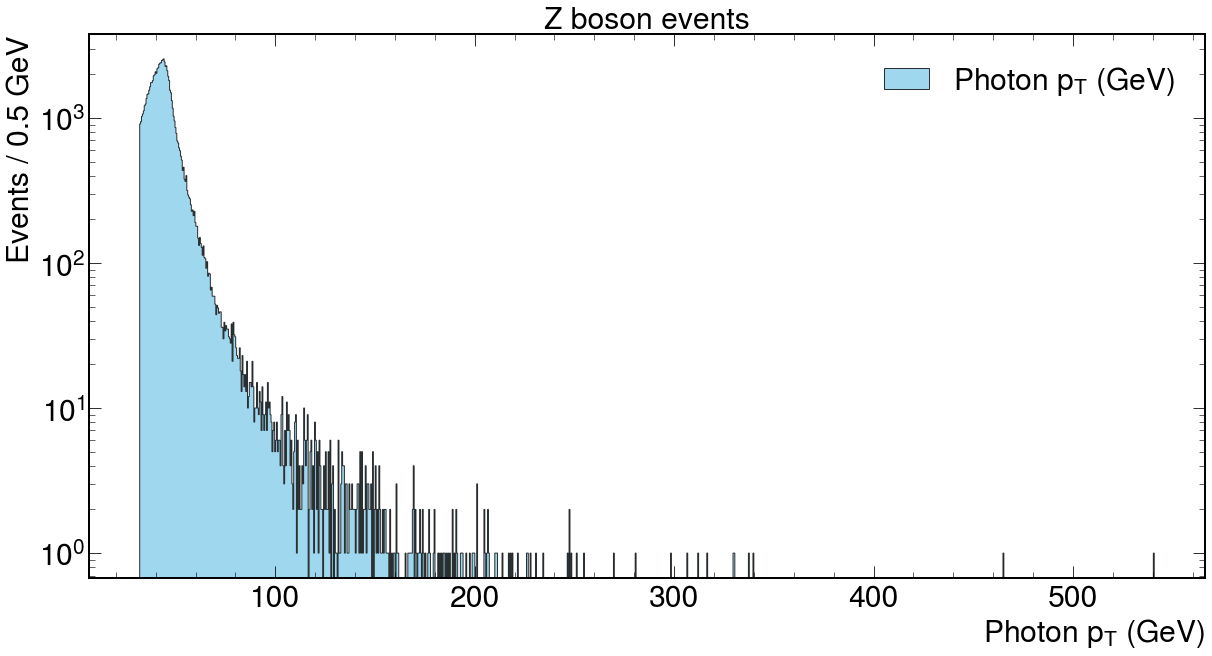

In [30]:
_min = 0
_max = ak.max(selectedPhoton1.pt)
width = .5 # GeV
nbins = int(round((_max - _min) / width)) + 1

_photon1_pt =  ak.flatten(selectedPhoton1.pt[(selectedPhoton1.pt > _min) & (selectedPhoton1.pt < _max)], axis = None)

fig, ax = plt.subplots(figsize=(20, 10))
ax.hist(
    _photon1_pt,
    bins = nbins,
    histtype = "stepfilled",
    color = "skyblue",
    alpha = 0.8,
    edgecolor = "black",
    label = r"Photon $p_{T}$ (GeV)"
)
ax.set_yscale("log")
ax.tick_params(axis = 'both', which = 'major', labelsize = 30)
ax.set_xlabel("Photon $p_{T}$ (GeV)", fontsize = 30)
ax.set_ylabel("Events / %.1f GeV" % width, fontsize = 30)
#ax.set_xlim(_min, _max)
#ax.set_ylim(0, 5)
ax.legend(loc = "best", fontsize = 30)
ax.set_title("Z boson events", fontsize = 30)

### Invariant $\mu\mu$ mass

Text(0.5, 1.0, 'Z boson events')

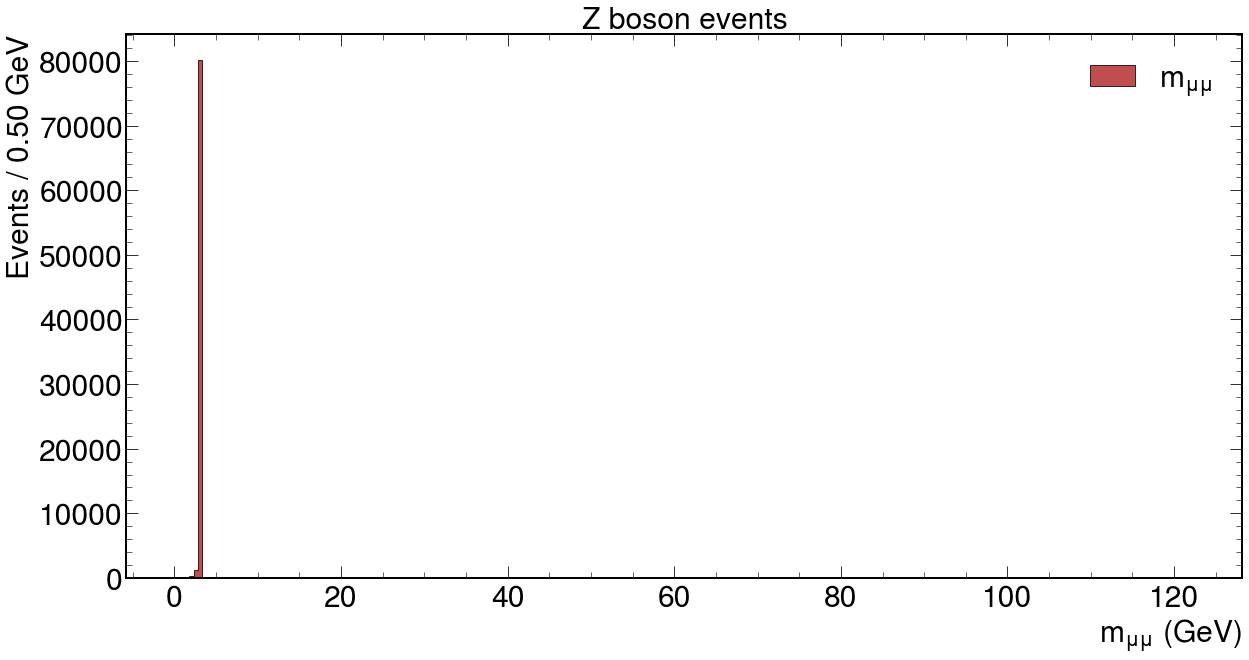

In [31]:
_min = 0
_max = ak.max(selectedJPsi.mass)
width = .5 # GeV
nbins = int(round((_max - _min) / width)) + 1

_JPsi_mass =  ak.flatten(selectedJPsi.mass[(selectedJPsi.mass > _min) & (selectedJPsi.mass < _max)], axis = None)


fig, ax = plt.subplots(figsize=(20, 10))
ax.hist(
    _JPsi_mass,
    bins = nbins,
    histtype = "stepfilled",
    color = "firebrick",
    alpha = 0.8,
    edgecolor = "black",
    label = r"$m_{\mu \mu}$"
)
#ax.set_yscale("log")
ax.tick_params(axis = 'both', which = 'major', labelsize = 30)
ax.set_xlabel("$m_{\mu \mu}\ ({\\rm GeV})$", fontsize = 30)
ax.set_ylabel("Events / %.2f GeV" % width, fontsize = 30)
#ax.set_xlim(_min, _max)
#ax.set_ylim(0, 5)
ax.legend(loc = "best", fontsize = 30)
ax.set_title("Z boson events", fontsize = 30)

### Invariant $\mu\mu\gamma$ mass

Text(0.5, 1.0, 'Z boson events')

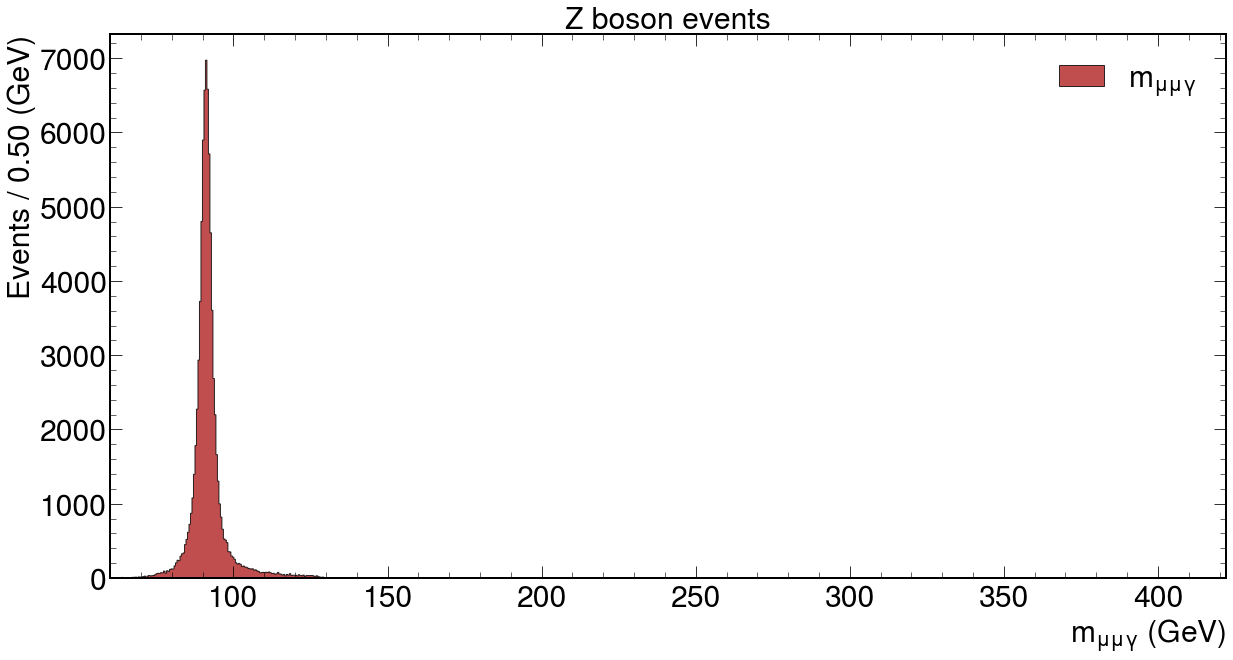

In [32]:
_min = 60
_max = ak.max(selectedHorZ.mass) + 10
width = .5 # GeV
nbins = int(round((_max - _min) / width)) + 1

_HorZ_mass =  ak.flatten(selectedHorZ.mass[(selectedHorZ.mass > _min) & (selectedHorZ.mass < _max)], axis = None)


fig, ax = plt.subplots(figsize=(20, 10))
ax.hist(
    _HorZ_mass,
    bins = nbins,
    histtype = "stepfilled",
    color = "firebrick",
    alpha = 0.8,
    edgecolor = "black",
    label = r"$m_{\mu \mu \gamma}$"
)
#ax.set_yscale("log")
ax.tick_params(axis = 'both', which = 'major', labelsize = 30)
ax.set_xlabel("$m_{\mu \mu \gamma}\ ({\\rm GeV})$", fontsize = 30)
ax.set_ylabel("Events / %.2f (GeV)" % width, fontsize = 30)
ax.set_xlim(_min, _max)
#ax.set_ylim(0, 5)
ax.legend(loc = "best", fontsize = 30)
ax.set_title("Z boson events", fontsize = 30)

In [33]:
print("Events that satisfy 3 GeV < m(JPsi) < 3.2 GeV:", len(selectedJPsi.mass[(selectedJPsi.mass > 3) & (selectedJPsi.mass < 3.2)]))
print("Events that satisfy 70 < m(Z) < 120 GeV:", len(selectedHorZ.mass[(selectedHorZ.mass > 70.) & (selectedHorZ.mass < 120.)]))
print("Events that satisfy 3 GeV < m(JPsi) < 3.2 GeV AND 70 < m(Z) < 120 GeV:", len(selectedHorZ.mass[(selectedJPsi.mass > 3.) & (selectedJPsi.mass < 3.2) & (selectedHorZ.mass > 70.) & (selectedHorZ.mass < 120.)]))

Events that satisfy 3 GeV < m(JPsi) < 3.2 GeV: 76201
Events that satisfy 70 < m(Z) < 120 GeV: 81173
Events that satisfy 3 GeV < m(JPsi) < 3.2 GeV AND 70 < m(Z) < 120 GeV: 75634


## Plots H boson

In [34]:
selectedMuon1 = H_events.Muon1[H_mask_kin_HLT]
selectedMuon2 = H_events.Muon2[H_mask_kin_HLT]
selectedPhoton1 = H_events.Photon1[H_mask_kin_HLT]
selectedJPsi = H_events.JPsi[H_mask_kin_HLT]
selectedHorZ = H_events.HorZ[H_mask_kin_HLT]

In [35]:
print("Passing from %i to %i filtered events after HLT trigger AND selection cuts (%.2f %%)" % (len(H_events), ak.sum(H_mask_kin_HLT), ak.sum(H_mask_kin_HLT) / len(H_events) * 100))

Passing from 179556 to 142102 filtered events after HLT trigger AND selection cuts (79.14 %)


### Muons $p_{T}$

Text(0.5, 1.0, 'H boson events')

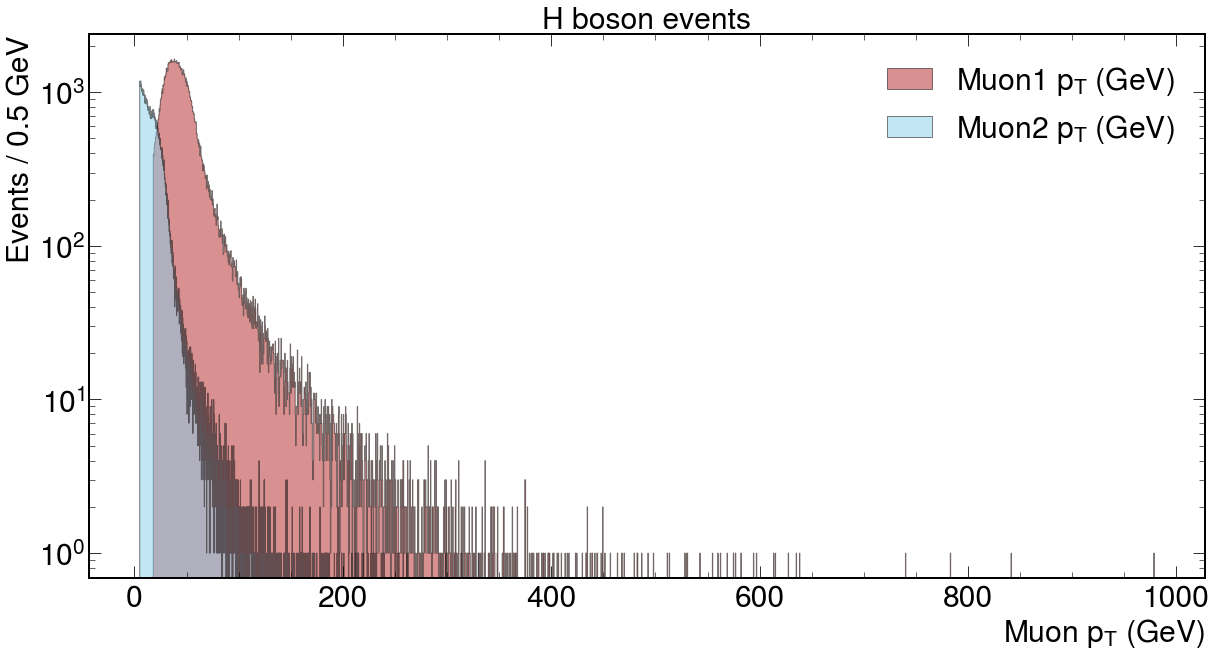

In [36]:
_min = 0
_max = ak.max(selectedMuon1.pt)
width = .5 # GeV
nbins = int(round((_max - _min) / width)) + 1

_muon1_pt =  ak.flatten(selectedMuon1.pt[(selectedMuon1.pt > _min) & (selectedMuon1.pt < _max)], axis = None)
_muon2_pt =  ak.flatten(selectedMuon2.pt[(selectedMuon2.pt > _min) & (selectedMuon2.pt < _max)], axis = None)

fig, ax = plt.subplots(figsize=(20, 10))
ax.hist(
    _muon1_pt,
    bins = nbins,
    histtype = "stepfilled",
    color = "firebrick",
    alpha = 0.5,
    edgecolor = "black",
    label = r"Muon1 $p_{T}$ (GeV)"
)
ax.hist(
    _muon2_pt,
    bins = nbins,
    histtype = "stepfilled",
    color = "skyblue",
    alpha = 0.5,
    edgecolor = "black",
    label = r"Muon2 $p_{T}$ (GeV)"
)
ax.set_yscale("log")
ax.tick_params(axis = 'both', which = 'major', labelsize = 30)
ax.set_xlabel("Muon $p_{T}$ (GeV)", fontsize = 30)
ax.set_ylabel("Events / %.1f GeV" % width, fontsize = 30)
#ax.set_xlim(_min, _max)
#ax.set_ylim(0, 5)
ax.legend(loc = "best", fontsize = 30)
ax.set_title("H boson events", fontsize = 30)

### Photon $p_{T}$

Text(0.5, 1.0, 'H boson events')

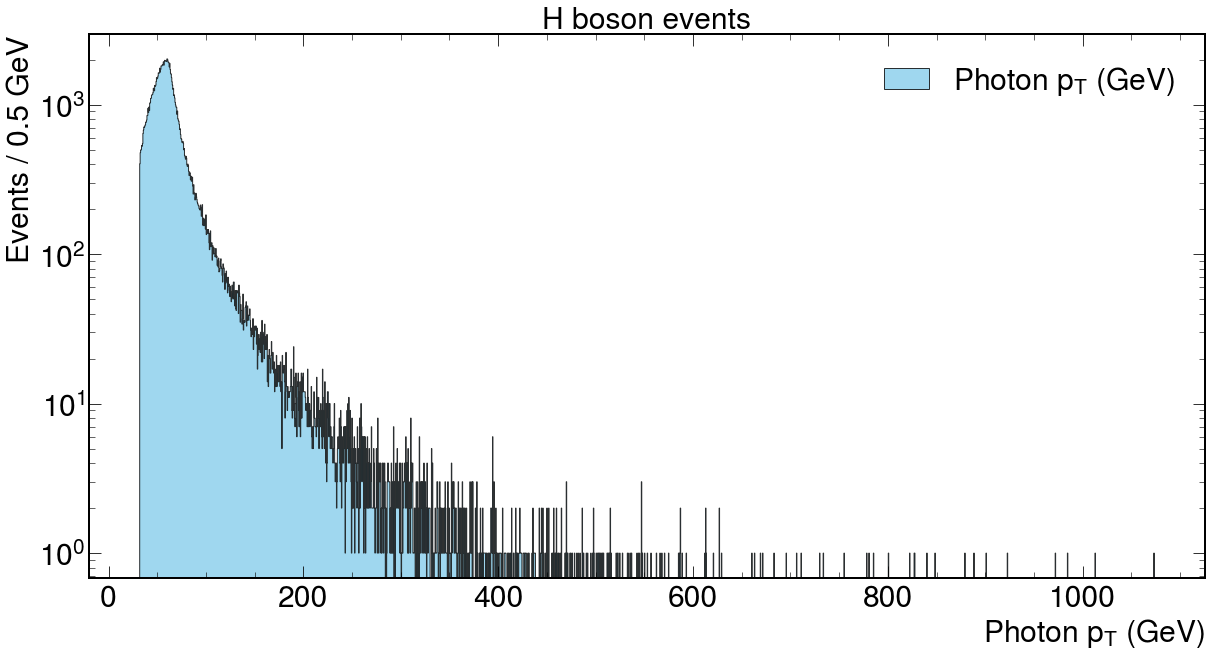

In [37]:
_min = 0
_max = ak.max(selectedPhoton1.pt)
width = .5 # GeV
nbins = int(round((_max - _min) / width)) + 1

_photon1_pt =  ak.flatten(selectedPhoton1.pt[(selectedPhoton1.pt > _min) & (selectedPhoton1.pt < _max)], axis = None)

fig, ax = plt.subplots(figsize=(20, 10))
ax.hist(
    _photon1_pt,
    bins = nbins,
    histtype = "stepfilled",
    color = "skyblue",
    alpha = 0.8,
    edgecolor = "black",
    label = r"Photon $p_{T}$ (GeV)"
)
ax.set_yscale("log")
ax.tick_params(axis = 'both', which = 'major', labelsize = 30)
ax.set_xlabel("Photon $p_{T}$ (GeV)", fontsize = 30)
ax.set_ylabel("Events / %.1f GeV" % width, fontsize = 30)
#ax.set_xlim(_min, _max)
#ax.set_ylim(0, 5)
ax.legend(loc = "best", fontsize = 30)
ax.set_title("H boson events", fontsize = 30)

### Invariant $\mu\mu$ mass

Text(0.5, 1.0, 'H boson events')

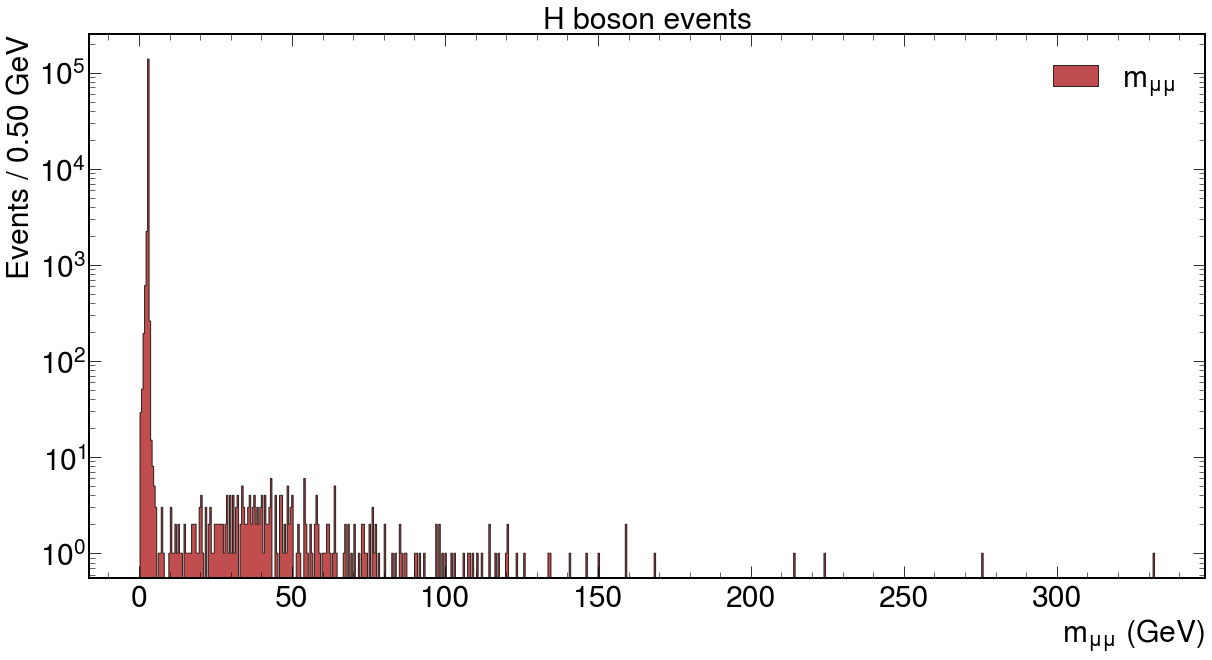

In [38]:
_min = 0
_max = ak.max(selectedJPsi.mass)
width = .5 # GeV
nbins = int(round((_max - _min) / width)) + 1

_JPsi_mass =  ak.flatten(selectedJPsi.mass[(selectedJPsi.mass > _min) & (selectedJPsi.mass < _max)], axis = None)


fig, ax = plt.subplots(figsize=(20, 10))
ax.hist(
    _JPsi_mass,
    bins = nbins,
    histtype = "stepfilled",
    color = "firebrick",
    alpha = 0.8,
    edgecolor = "black",
    label = r"$m_{\mu \mu}$"
)
ax.set_yscale("log")
ax.tick_params(axis = 'both', which = 'major', labelsize = 30)
ax.set_xlabel("$m_{\mu \mu}\ ({\\rm GeV})$", fontsize = 30)
ax.set_ylabel("Events / %.2f GeV" % width, fontsize = 30)
#ax.set_xlim(_min, _max)
#ax.set_ylim(0, 5)
ax.legend(loc = "best", fontsize = 30)
ax.set_title("H boson events", fontsize = 30)

### Invariant $\mu\mu\gamma$ mass

Text(0.5, 1.0, 'H boson events')

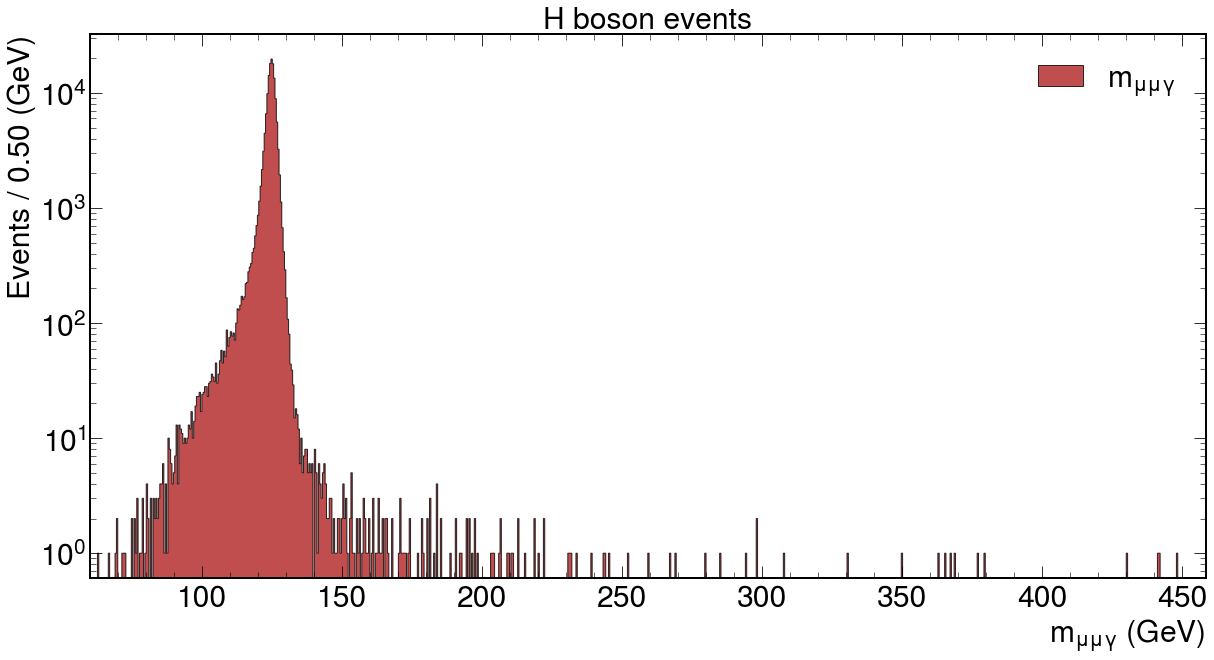

In [39]:
_min = 60
_max = ak.max(selectedHorZ.mass) + 10
width = .5 # GeV
nbins = int(round((_max - _min) / width)) + 1

_HorZ_mass =  ak.flatten(selectedHorZ.mass[(selectedHorZ.mass > _min) & (selectedHorZ.mass < _max)], axis = None)


fig, ax = plt.subplots(figsize=(20, 10))
ax.hist(
    _HorZ_mass,
    bins = nbins,
    histtype = "stepfilled",
    color = "firebrick",
    alpha = 0.8,
    edgecolor = "black",
    label = r"$m_{\mu \mu \gamma}$"
)
ax.set_yscale("log")
ax.tick_params(axis = 'both', which = 'major', labelsize = 30)
ax.set_xlabel("$m_{\mu \mu \gamma}\ ({\\rm GeV})$", fontsize = 30)
ax.set_ylabel("Events / %.2f (GeV)" % width, fontsize = 30)
ax.set_xlim(_min, _max)
#ax.set_ylim(0, 5)
ax.legend(loc = "best", fontsize = 30)
ax.set_title("H boson events", fontsize = 30)

In [40]:
print("Events that satisfy 3 GeV < m(JPsi) < 3.2 GeV:", len(selectedJPsi.mass[(selectedJPsi.mass > 3) & (selectedJPsi.mass < 3.2)]))
print("Events that satisfy 100 < m(H) < 150 GeV:", len(selectedHorZ.mass[(selectedHorZ.mass > 100.) & (selectedHorZ.mass < 150.)]))
print("Events that satisfy 3 GeV < m(JPsi) < 3.2 GeV AND 100 < m(H) < 150 GeV:", len(selectedHorZ.mass[(selectedJPsi.mass > 3.) & (selectedJPsi.mass < 3.2) & (selectedHorZ.mass > 100.) & (selectedHorZ.mass < 150.)]))

Events that satisfy 3 GeV < m(JPsi) < 3.2 GeV: 130844
Events that satisfy 100 < m(H) < 150 GeV: 141572
Events that satisfy 3 GeV < m(JPsi) < 3.2 GeV AND 100 < m(H) < 150 GeV: 130766


## Plot invariant $\mu\mu$ mass plot (combined)

In [41]:
JPsi_QCD = QCD_events.JPsi[QCD_mask_kin_HLT]
JPsi_Z = Z_events.JPsi[Z_mask_kin_HLT]
JPsi_H = H_events.JPsi[H_mask_kin_HLT]

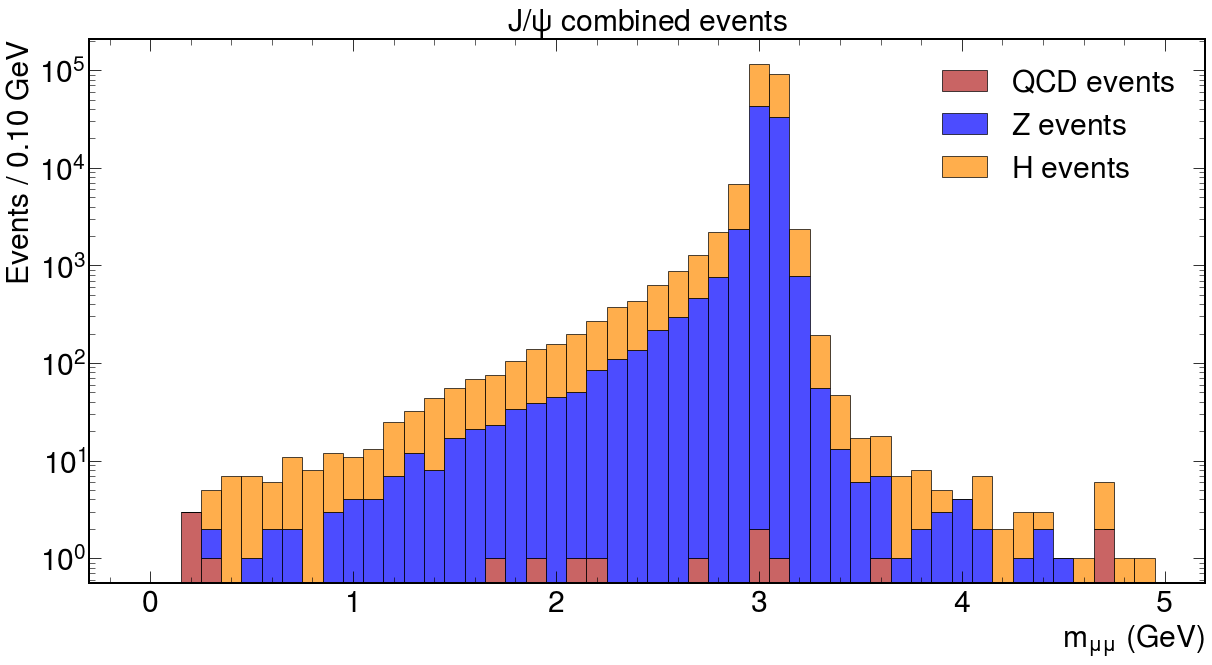

In [229]:
_min = 0
_max = 5. # max(ak.max(JPsi_QCD.mass), ak.max(JPsi_Z.mass), ak.max(JPsi_H.mass))
width = .1 # GeV
nbins = int(round((_max - _min) / width)) + 1
xbins = np.linspace(_min, _max, nbins)

_JPsi_mass_QCD =  ak.flatten(JPsi_QCD.mass[(JPsi_QCD.mass > _min) & (JPsi_QCD.mass < _max)], axis = None)
_JPsi_mass_Z =  ak.flatten(JPsi_Z.mass[(JPsi_Z.mass > _min) & (JPsi_Z.mass < _max)], axis = None)
_JPsi_mass_H =  ak.flatten(JPsi_H.mass[(JPsi_H.mass > _min) & (JPsi_H.mass < _max)], axis = None)

_JPsi_mass = [ak.to_numpy(_JPsi_mass_QCD), ak.to_numpy(_JPsi_mass_Z), ak.to_numpy(_JPsi_mass_H)]
labels = ["${\\rm QCD\ events}$", "${\\rm Z\ events}$", "${\\rm H\ events}$"]
colors = ["firebrick", "blue", "darkorange"]

fig, ax = plt.subplots(figsize=(20, 10))
h, bins, _ = ax.hist(
    _JPsi_mass,
    bins = xbins,
    #histtype = "stepfilled",
    color = colors,
    alpha = 0.7,
    edgecolor = "black",
    stacked = True,
    label = labels,
    align = "left"
)
ax.set_yscale("log")
ax.tick_params(axis = 'both', which = 'major', labelsize = 30)
ax.set_xlabel("$m_{\mu \mu}\ ({\\rm GeV})$", fontsize = 30)
ax.set_ylabel("Events / %.2f GeV" % width, fontsize = 30)
#ax.set_xlim(_min, _max)
#ax.set_ylim(0, 12)
ax.legend(loc = "best", fontsize = 30)
ax.set_title("${\\rm J}/\psi$ combined events", fontsize = 30)
plt.savefig("plots/combinedEventsTest_JPsi.pdf")

## Plot invariant $\mu\mu\gamma$ mass plot (combined)

In [230]:
HorZ_QCD = QCD_events.HorZ[QCD_mask_kin_HLT]
HorZ_Z = Z_events.HorZ[Z_mask_kin_HLT]
HorZ_H = H_events.HorZ[H_mask_kin_HLT]

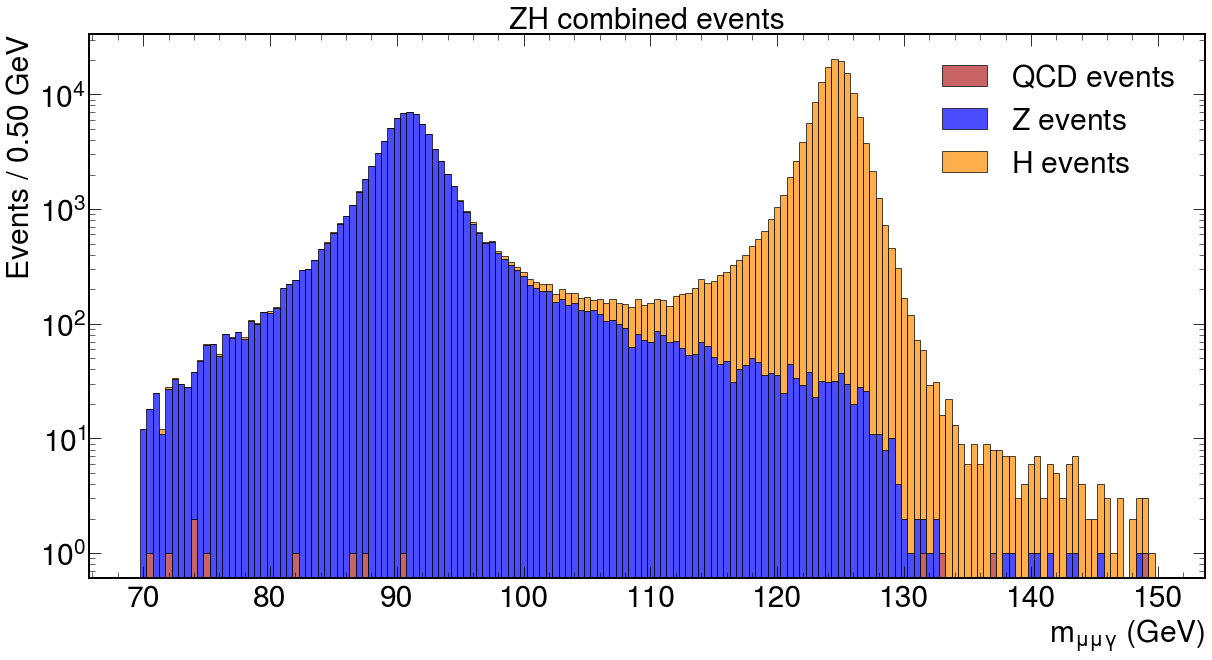

In [231]:
_min = 70.
_max = 150. # max(ak.max(JPsi_QCD.mass), ak.max(JPsi_Z.mass), ak.max(JPsi_H.mass))
width = .5 # GeV
nbins = int(round((_max - _min) / width)) + 1
xbins = np.linspace(_min, _max, nbins)

_HorZ_mass_QCD =  ak.flatten(HorZ_QCD.mass[(HorZ_QCD.mass > _min) & (HorZ_QCD.mass < _max)], axis = None)
_HorZ_mass_Z =  ak.flatten(HorZ_Z.mass[(HorZ_Z.mass > _min) & (HorZ_Z.mass < _max)], axis = None)
_HorZ_mass_H =  ak.flatten(HorZ_H.mass[(HorZ_H.mass > _min) & (HorZ_H.mass < _max)], axis = None)

_HorZ_mass = [ak.to_numpy(_HorZ_mass_QCD), ak.to_numpy(_HorZ_mass_Z), ak.to_numpy(_HorZ_mass_H)]
labels = ["${\\rm QCD\ events}$", "${\\rm Z\ events}$", "${\\rm H\ events}$"]
colors = ["firebrick", "blue", "darkorange"]

fig, ax = plt.subplots(figsize=(20, 10))
h, bins, _ = ax.hist(
    _HorZ_mass,
    bins = xbins,
    #histtype = "stepfilled",
    color = colors,
    alpha = 0.7,
    edgecolor = "black",
    stacked = True,
    label = labels,
    align = "left"
)
ax.set_yscale("log")
ax.tick_params(axis = 'both', which = 'major', labelsize = 30)
ax.set_xlabel("$m_{\mu \mu \gamma}\ ({\\rm GeV})$", fontsize = 30)
ax.set_ylabel("Events / %.2f GeV" % width, fontsize = 30)
#ax.set_xlim(_min, _max)
#ax.set_ylim(0, 12)
ax.legend(loc = "best", fontsize = 30)
ax.set_title("ZH combined events", fontsize = 30)
plt.savefig("plots/combinedEventsTest_ZH.pdf")